In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [92]:
##### Train RMSE, Train MAPE, Test RMSE, Test MAPE
multivariate = [[2.880642477257571, 10.007259508312966, 1.4784907249762735, 4.638666261736157], 
                [2.8321592534276845, 9.972839585443124, 1.524028803228934, 4.827203348566517], 
                [2.9856002175558762, 10.364071457952178, 1.6213736397567058, 5.224765058146817], 
                [3.0274062083861955, 10.696449693514499, 1.5258579754726262, 5.0046168821367365], 
                [2.7909717795641313, 9.50760149885351, 1.552473602992573, 5.0201513647173215]]
univariate = [[3.0993869823933906, 10.813187908062755, 1.6762343569073055, 5.589913114290748],
             [3.1455785495970696, 11.023146284809044, 1.6591497062372722, 5.449366419349877],
             [3.1114624620920592, 10.894692785756682, 1.6572687361190028, 5.503572034372162],
             [3.1625260716382693, 10.824215190387825, 1.5079337704109983, 5.425596452831647],
             [3.153572163428867, 11.179381064751013, 1.750413903521624, 5.836911901763748]]

In [93]:
uni=[]
for i in range(len(univariate)):
    uni.append(univariate[i][3])
print(uni)

multi=[]
for i in range(len(multivariate)):
    multi.append(multivariate[i][3])
print(multi)

[5.589913114290748, 5.449366419349877, 5.503572034372162, 5.425596452831647, 5.836911901763748]
[4.638666261736157, 4.827203348566517, 5.224765058146817, 5.0046168821367365, 5.0201513647173215]


In [94]:
##### mean and standard deviation
uni_mean = np.mean(univariate, axis = 0)
uni_std = np.std(univariate, axis = 0)
multi_mean = np.mean(multivariate, axis = 0)
multi_std = np.std(multivariate, axis = 0)

In [95]:
##### t-test
stats.ttest_ind(uni, multi, equal_var = False)

Ttest_indResult(statistic=4.994321653530458, pvalue=0.0013164673615376234)

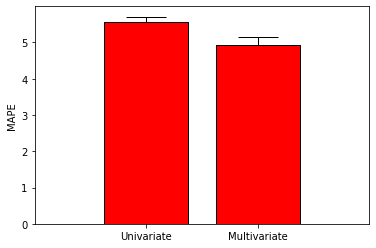

In [96]:
##### bar graph
mean = [uni_mean[3], multi_mean[3]]
stds = [uni_std[3], multi_std[3]]
xticklabels = ['Univariate', 'Multivariate']

fig, ax = plt.subplots()
ax.bar(np.arange(2), mean, color='red', edgecolor="black", width=0.75, align='center')
ax.set_xticks([])
ax.set_xticks(np.arange(2))
ax.set_xticklabels(xticklabels, rotation=0)
ax.set_xlim(-1, 2)
ax.set_ylabel('MAPE')
#ax.set_title(title)

a, b, c = ax.errorbar(np.arange(2), mean, color='black', yerr=stds, lolims=True, capsize=20, elinewidth=1, linestyle='')
for cap in b:
    cap.set_marker('_')

plt.show()
fig.savefig('uni_vs_multi.png')